In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
data = data.drop(columns = 'Unnamed: 0', axis=1)

data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


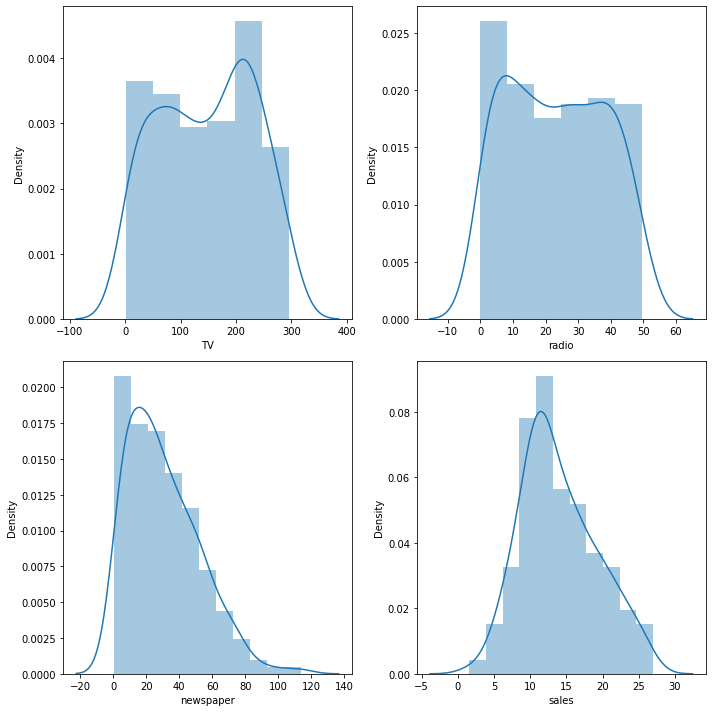

In [8]:
plt.figure(figsize = (10,10))
plotnumber = 1

for column in data:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 10)
    plotnumber +=1
plt.tight_layout()

There seems to be some skewness present in the data. We will confirm that in furthur steps.

<AxesSubplot:xlabel='TV', ylabel='sales'>

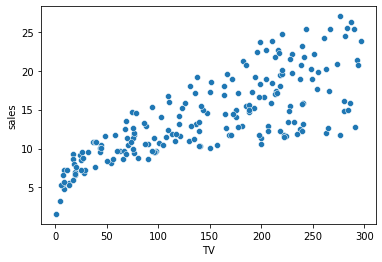

In [9]:
# Lets Check the Scatter plot between Independent and Dependent Variable.

sns.scatterplot(x = 'TV', y = 'sales', data = data)

There seems to be a relation between TV and sales, as the curve is linearly distributed. We will check the value from correlation table.

<AxesSubplot:xlabel='radio', ylabel='sales'>

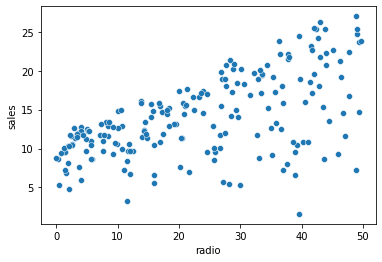

In [10]:
sns.scatterplot(x = 'radio', y = 'sales', data = data)

There is nothing much conclusive from Sales vs Radio graph, but it can be seen that it certainly follows some pattern, where as radio data goes up, sales also increases.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

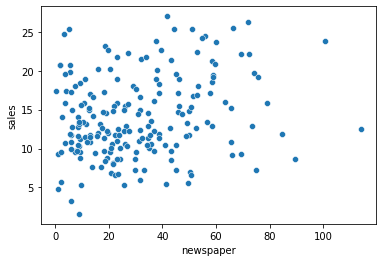

In [11]:
sns.scatterplot(x = 'newspaper', y = 'sales', data = data)

Newspaper vs sales graph is randomly distributed.

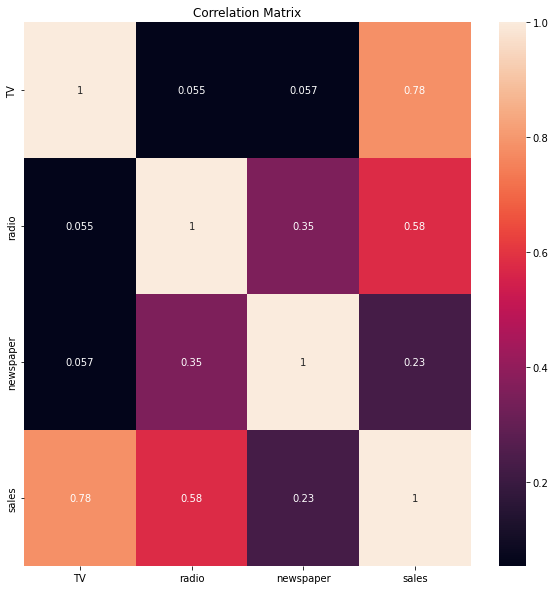

In [12]:
data_corr = data.corr().abs()

plt.figure(figsize = (10,10))

sns.heatmap(data_corr, annot=True)

plt.title("Correlation Matrix")
plt.show()

The correlation values for dataset shows that there is a relation between TV and Sales, apart from that there is no such relation among other features.

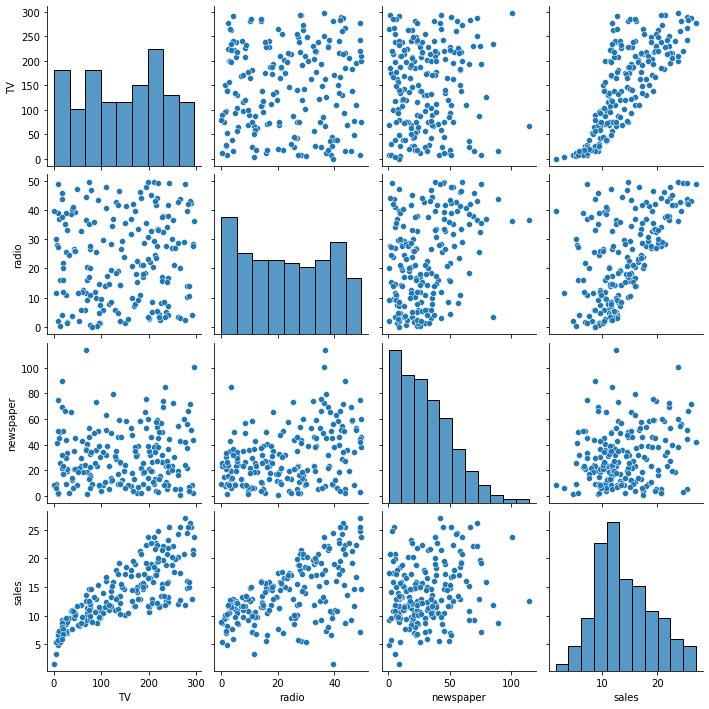

In [13]:
sns.pairplot(data)

plt.show()

In [14]:
x = data.drop(columns = ['sales'])
y = data['sales']

In [15]:
x.skew().sort_values(ascending = False)

newspaper    0.894720
radio        0.094175
TV          -0.069853
dtype: float64

In [16]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [17]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

In [18]:
x = pd.DataFrame(x_new, columns = x.columns)

x.head()

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704


In [19]:
x.skew()[np.abs(x.skew())<0.25].all()

True

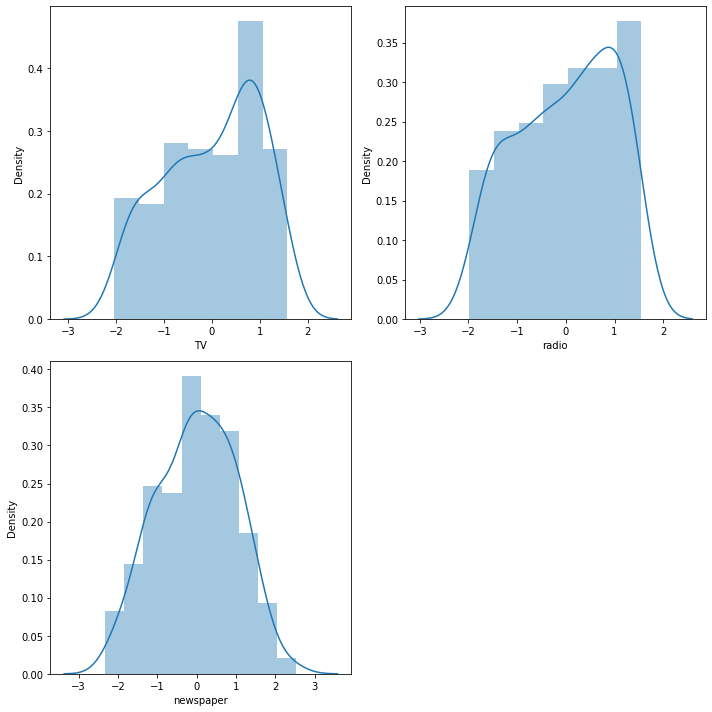

In [20]:
plt.figure(figsize = (10,10))
plotnumber = 1

for column in x:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 10)
    plotnumber +=1
plt.tight_layout()

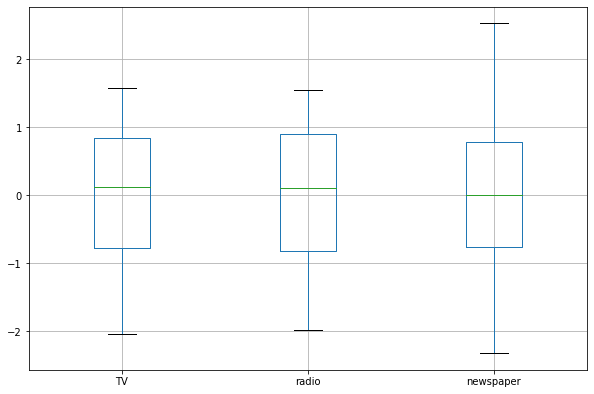

In [21]:
# checking Outliers

x.iloc[:,:].boxplot(figsize = (10,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [22]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

TV           True
radio        True
newspaper    True
dtype: bool

Since There is no outlier present in data, we can proceed ahead.

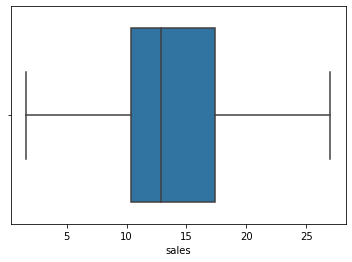

In [23]:
# Checking outliers in Target column

sns.boxplot(y)

plt.show()

There is no outlier present in sales data, and it is having mean value range from 10 to 17.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [25]:
max_r2_score = 0
maxRS = 0

for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    r2score = r2_score(y_test,y_pred)
    print('r2_score', r2score*100,'%', 'random_state', i)
    
    if r2score > max_r2_score:
        max_r2_score = r2score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score 91.27783752035566 % random_state 1
r2_score 91.27783752035566 % random_state 1
r2_score 82.5630578545904 % random_state 2
r2_score 89.69911283672779 % random_state 3
r2_score 90.91498622840182 % random_state 4
r2_score 89.78350865173104 % random_state 5
r2_score 92.00502433240167 % random_state 6
r2_score 92.00502433240167 % random_state 6
r2_score 91.33377447361889 % random_state 7
r2_score 88.33381553849966 % random_state 8
r2_score 91.51837614445915 % random_state 9
r2_score 86.58496476110761 % random_state 10
r2_score 89.25336064747864 % random_state 11
r2_score 91.92123829791696 % random_state 12
r2_score 93.79030875501375 % random_state 13
r2_score 93.79030875501375 % random_state 13
r2_score 89.6197779218918 % random_state 14
r2_score 89.86164790056645 % random_state 15
r2_score 92.61021273502936 % random_state 16
r2_score 87.997200403163 % random_state 17
r2_score 89.22737860915655 % random_state 18
r2_score 89.66138721127817 % random_state 19
r2_score 88.8916849922331

r2_score 87.71855626239098 % random_state 189
r2_score 90.69486986522628 % random_state 190
r2_score 91.66863995814509 % random_state 191
r2_score 91.42444193618563 % random_state 192
r2_score 91.20443986349198 % random_state 193
r2_score 93.51295380959719 % random_state 194
r2_score 86.98530049134554 % random_state 195
r2_score 91.44350950594439 % random_state 196
r2_score 90.07494706178814 % random_state 197
r2_score 91.01526514487169 % random_state 198
r2_score 88.16072409476435 % random_state 199
r2_score 88.15396812705221 % random_state 200
r2_score 92.85752183927268 % random_state 201
r2_score 92.0333545413804 % random_state 202
r2_score 88.40311598360367 % random_state 203
r2_score 88.66567890645187 % random_state 204
r2_score 91.09802381580624 % random_state 205
r2_score 90.00534091029742 % random_state 206
r2_score 87.48162464474647 % random_state 207
r2_score 88.10166414188312 % random_state 208
r2_score 86.25496205589945 % random_state 209
r2_score 87.77663054994949 % random

r2_score 90.22041220823628 % random_state 371
r2_score 86.19114739079822 % random_state 372
r2_score 90.22626787723426 % random_state 373
r2_score 90.22946039290444 % random_state 374
r2_score 88.74828312469793 % random_state 375
r2_score 88.34051277253884 % random_state 376
r2_score 86.9358175823865 % random_state 377
r2_score 88.8215385994134 % random_state 378
r2_score 88.92832177790994 % random_state 379
r2_score 89.61430903480358 % random_state 380
r2_score 89.17495352737748 % random_state 381
r2_score 91.81917917260496 % random_state 382
r2_score 87.15386719951634 % random_state 383
r2_score 89.33170897837975 % random_state 384
r2_score 84.94839690926807 % random_state 385
r2_score 89.07322440778009 % random_state 386
r2_score 88.63379790873496 % random_state 387
r2_score 87.08440353354987 % random_state 388
r2_score 92.15293846874367 % random_state 389
r2_score 88.34403517509392 % random_state 390
r2_score 88.39134001950873 % random_state 391
r2_score 89.74129018968308 % random_

r2_score 88.87035947146386 % random_state 560
r2_score 92.17606192838768 % random_state 561
r2_score 89.26203902106357 % random_state 562
r2_score 84.64333550790863 % random_state 563
r2_score 91.26551922837777 % random_state 564
r2_score 91.10223875329518 % random_state 565
r2_score 87.01944594482677 % random_state 566
r2_score 93.22528667232908 % random_state 567
r2_score 91.80152298894113 % random_state 568
r2_score 90.39696211610668 % random_state 569
r2_score 89.92527903842769 % random_state 570
r2_score 87.63985163908082 % random_state 571
r2_score 89.89597356308933 % random_state 572
r2_score 91.16344510719915 % random_state 573
r2_score 91.2943988608267 % random_state 574
r2_score 88.11309720844484 % random_state 575
r2_score 92.45725356429703 % random_state 576
r2_score 92.54167650919777 % random_state 577
r2_score 84.54252763663625 % random_state 578
r2_score 87.6886299905599 % random_state 579
r2_score 88.6377097525941 % random_state 580
r2_score 90.00501050570634 % random_s

r2_score 90.7807429624246 % random_state 744
r2_score 92.56077373646424 % random_state 745
r2_score 91.09051355631249 % random_state 746
r2_score 87.5334715488994 % random_state 747
r2_score 92.21139318106498 % random_state 748
r2_score 89.74681309496724 % random_state 749
r2_score 88.96295789233216 % random_state 750
r2_score 89.50899964482139 % random_state 751
r2_score 91.32147032334119 % random_state 752
r2_score 91.30850717716534 % random_state 753
r2_score 91.46572180462151 % random_state 754
r2_score 90.29661216496766 % random_state 755
r2_score 88.80327487601073 % random_state 756
r2_score 88.81970266567565 % random_state 757
r2_score 88.65383836616176 % random_state 758
r2_score 91.09513256604085 % random_state 759
r2_score 92.54030227974562 % random_state 760
r2_score 88.02913350598229 % random_state 761
r2_score 88.78502609100106 % random_state 762
r2_score 88.63351513469905 % random_state 763
r2_score 87.93261370001397 % random_state 764
r2_score 90.16087616364602 % random_

r2_score 88.66724053937848 % random_state 928
r2_score 89.60321386677069 % random_state 929
r2_score 89.45695195537525 % random_state 930
r2_score 91.60605957060486 % random_state 931
r2_score 89.06016131242305 % random_state 932
r2_score 87.68912441588947 % random_state 933
r2_score 90.18751752874475 % random_state 934
r2_score 90.26791217971412 % random_state 935
r2_score 87.92160332713073 % random_state 936
r2_score 91.24350183298064 % random_state 937
r2_score 87.38644621798059 % random_state 938
r2_score 90.319174348593 % random_state 939
r2_score 91.10619632255191 % random_state 940
r2_score 91.45403782720271 % random_state 941
r2_score 91.1542337346094 % random_state 942
r2_score 89.09026420986777 % random_state 943
r2_score 93.46513138175825 % random_state 944
r2_score 88.83057733686283 % random_state 945
r2_score 92.19243198702802 % random_state 946
r2_score 89.31050484937477 % random_state 947
r2_score 90.16330374480387 % random_state 948
r2_score 91.4628030478474 % random_st

In [26]:
print('Best R2 Score is', max_r2_score, 'on Random_state', maxRS)

Best R2 Score is 0.9439266880843906 on Random_state 801


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 801)

In [28]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [29]:
print('Intercept: ', reg.intercept_)
print('Linear Coefficient: ', reg.coef_)

Intercept:  13.964898174097932
Linear Coefficient:  [3.94680714 2.72224002 0.03556241]


In [31]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: ', r2_score(y_test, y_pred))

Root Mean Squared Error: 1.2448822295297037
R2 Score:  0.9439266880843906


Since there seems to be some relation between independent variable --> TV and Target Variable --> sales, therefore applying Hypothesis Testing to identify whether relation between them exists or not

# Hypothesis Testing and P-Values

- Ho = there is no relation between TV Advt and Sales.
- Ha = There exists a relation between TV advt and Sales.

In [32]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'TV ~ sales', data = data).fit()

lm.pvalues

Intercept    2.443396e-03
sales        1.467390e-42
dtype: float64

- now since, the p-value is less than alpha value(i.e. 0.05), we reject the null hypothesis.
- which means, there exists a relation between the TV advt and sales.

In [33]:
lm.rsquared

0.6118750508500711

In [34]:
x = data[['TV','radio','newspaper']]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

print('Intercept: ',lm.intercept_)
print('TV: ', lm.coef_[0])
print('Radio: ', lm.coef_[1])
print('NewsPaper: ', lm.coef_[2])

Intercept:  2.938889369459412
TV:  0.0457646454553976
Radio:  0.18853001691820445
NewsPaper:  -0.0010374930424763285


In [35]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        18:36:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
lm = smf.ols(formula = 'sales ~ TV + radio', data = data).fit()

lm.rsquared

0.8971942610828956

In [37]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = data).fit()

lm.rsquared

0.8972106381789522

In [38]:
lm = smf.ols(formula = 'sales ~ TV', data = data).fit()

lm.rsquared

0.611875050850071

##### Observations

1. P value for TV and radio is very low, that means there is a strong relation between these variables and sales

2. p value for newspaper is 0.86, which is very high. we can assume that newspaper does not have any significant effect on sales.

3. R2 and Adj. R2 values are 0.897 and 0.896 respectively, which means the intercept model is very good.

4. it is clear from R2 values for different cases that: TV alone have correlation of about 61% with sales data, TV+Radio makes R2 value around 89.7% which is almost equal to TV+Radio+Newspaper.

# Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

r2score = r2_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(reg, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

At CV: 2
Cross Validation Score is:  89.08473589845056
R2_Score is :  0.9439266880843906
At CV: 3
Cross Validation Score is:  89.16464591145558
R2_Score is :  0.9439266880843906
At CV: 4
Cross Validation Score is:  89.00070660549507
R2_Score is :  0.9439266880843906
At CV: 5
Cross Validation Score is:  88.71063495438436
R2_Score is :  0.9439266880843906
At CV: 6
Cross Validation Score is:  88.99208882186672
R2_Score is :  0.9439266880843906
At CV: 7
Cross Validation Score is:  88.59930219823539
R2_Score is :  0.9439266880843906
At CV: 8
Cross Validation Score is:  88.26686689919153
R2_Score is :  0.9439266880843906
At CV: 9
Cross Validation Score is:  88.22728227103586
R2_Score is :  0.9439266880843906
At CV: 10
Cross Validation Score is:  88.53562237979617
R2_Score is :  0.9439266880843906


In [40]:
cvscore_selected = cross_val_score(reg, x, y, cv = 3).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.8916464591145559 
The R2_Score is:  0.9439266880843906


In [41]:
from sklearn import svm

regr = svm.SVR()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(regr, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.9289786628992593
Mean Squared Error:  1.962859306255429
At CV: 2
Cross Validation Score is:  74.26940135453893
R2_Score is :  0.9289786628992593
At CV: 3
Cross Validation Score is:  81.00228721420737
R2_Score is :  0.9289786628992593
At CV: 4
Cross Validation Score is:  83.02940078413418
R2_Score is :  0.9289786628992593
At CV: 5
Cross Validation Score is:  84.04415171122854
R2_Score is :  0.9289786628992593
At CV: 6
Cross Validation Score is:  85.21180775341581
R2_Score is :  0.9289786628992593
At CV: 7
Cross Validation Score is:  84.7672588365639
R2_Score is :  0.9289786628992593
At CV: 8
Cross Validation Score is:  84.73386075565246
R2_Score is :  0.9289786628992593
At CV: 9
Cross Validation Score is:  85.13061382661031
R2_Score is :  0.9289786628992593
At CV: 10
Cross Validation Score is:  85.62745894082171
R2_Score is :  0.9289786628992593


In [42]:
cvscore_selected = cross_val_score(regr, x, y, cv = 10).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.8562745894082171 
The R2_Score is:  0.9289786628992593


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(rf, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.9733880879671174
Mean Squared Error:  0.7354893799999971
At CV: 2
Cross Validation Score is:  97.16854109663554
R2_Score is :  0.9733880879671174
At CV: 3
Cross Validation Score is:  97.27390089708308
R2_Score is :  0.9733880879671174
At CV: 4
Cross Validation Score is:  97.7522570288597
R2_Score is :  0.9733880879671174
At CV: 5
Cross Validation Score is:  97.58204929166257
R2_Score is :  0.9733880879671174
At CV: 6
Cross Validation Score is:  97.72862667704206
R2_Score is :  0.9733880879671174
At CV: 7
Cross Validation Score is:  97.64030176230378
R2_Score is :  0.9733880879671174
At CV: 8
Cross Validation Score is:  97.75690878840688
R2_Score is :  0.9733880879671174
At CV: 9
Cross Validation Score is:  97.554923443454
R2_Score is :  0.9733880879671174


In [44]:
cvscore_selected = cross_val_score(rf, x, y, cv = 8).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.9772942714504537 
The R2_Score is:  0.9733880879671174


In [45]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(xgb, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.9656438985821943
Mean Squared Error:  0.9495201885447452
At CV: 2
Cross Validation Score is:  96.87062686514292
R2_Score is :  0.9656438985821943
At CV: 3
Cross Validation Score is:  96.70934527104112
R2_Score is :  0.9656438985821943
At CV: 4
Cross Validation Score is:  97.1013909538373
R2_Score is :  0.9656438985821943
At CV: 5
Cross Validation Score is:  96.54105249170779
R2_Score is :  0.9656438985821943
At CV: 6
Cross Validation Score is:  96.96968255369592
R2_Score is :  0.9656438985821943
At CV: 7
Cross Validation Score is:  96.76654644237219
R2_Score is :  0.9656438985821943
At CV: 8
Cross Validation Score is:  97.4772176208644
R2_Score is :  0.9656438985821943
At CV: 9
Cross Validation Score is:  96.99528534889143
R2_Score is :  0.9656438985821943


In [46]:
cvscore_selected = cross_val_score(xgb, x, y, cv = 8).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.9747721762086439 
The R2_Score is:  0.9656438985821943


In [47]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,10):
    cvscore = cross_val_score(knn, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.9483822039540336
Mean Squared Error:  1.4265919999999996
At CV: 2
Cross Validation Score is:  87.08759690342313
R2_Score is :  0.9483822039540336
At CV: 3
Cross Validation Score is:  88.71288956408932
R2_Score is :  0.9483822039540336
At CV: 4
Cross Validation Score is:  91.17144709082889
R2_Score is :  0.9483822039540336
At CV: 5
Cross Validation Score is:  90.85710686189529
R2_Score is :  0.9483822039540336
At CV: 6
Cross Validation Score is:  91.4253631934962
R2_Score is :  0.9483822039540336
At CV: 7
Cross Validation Score is:  91.28003507698193
R2_Score is :  0.9483822039540336
At CV: 8
Cross Validation Score is:  91.68735496707048
R2_Score is :  0.9483822039540336
At CV: 9
Cross Validation Score is:  91.3493270804459
R2_Score is :  0.9483822039540336


In [48]:
cvscore_selected = cross_val_score(knn, x, y, cv = 8).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.9168735496707048 
The R2_Score is:  0.9483822039540336


##### Observations:

1. Linear Regression Model:
        - R2 Score: 0.94
        - CV Score: 0.89
2. SVM Regression Model:
        - R2 Score: 0.92
        - CV Score: 0.85
3. Random Forest Regression Model:
        - R2 Score: 0.97
        - CV Score: 0.97
4. XGB Regression Model:
        - R2 Score: 0.96
        - CV Score: 0.97
5. KNeighbors Regression Model:
        - R2 Score: 0.94
        - CV Score: 0.91
        
        

Random Forest Regression Model has the best R2 Score and CV Score.

Therefore, selecting Random Forest Regression Model for HyperParameter Tuning.

# Hyper Parameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(10,100,10), 
              'max_depth': np.arange(1,21,5), 
              'min_samples_split': np.arange(2,21,5),
              'min_samples_leaf': np.arange(1,11,2)}

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

rf = grd.best_estimator_

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print('R2 Score: ', rf.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best Param ==> {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
R2 Score:  0.9749267162215569
Mean Squared Error:  0.6929653877550979


In [50]:
# Saving the Model

import joblib
joblib.dump(rf, "Sales_Prediction_Model.pkl")

['Sales_Prediction_Model.pkl']